In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Dataset Data_kuncie2.csv memiliki 200 baris dengan 7 kolom yang memiliki informasi sebagai berikut:

- customerID: sebagai identifier atau unique number yang mewakili 1 customer atau pelanggan pada dataset.


- Gender: informasi tentang jenis kelamin customer (Female dan Male) berbentuk data kategori.


- Age: gambaran umum tentang umur customer pada dataset (integer).


- Telco Spending (IDR 000): informasi jumlah spending / pembelian yang dilakukan oleh customer dalam waktu sebulan (integer).


- Purchasing power (1-100): mewakili informasi tentang daya beli yang dilakukan oleh customer. Rank paling rendah yaitu 1 dan rank paling tinggi yaitu 100 (integer).


- Length of Stay (months): menggambarkan waktu periode customer berlangganan terhadap layanan Telco dalam satuan bulan (integer).


- Payload (Gb): kuota atau paket data yang digunakan oleh customer (integer).


- Voice (Minutes): layanan panggilan yang digunakan oleh customer (integer).

# EDA

Tujuan dari EDA adalah untuk mendapatkan pemahaman yang lebih baik tentang data, mengidentifikasi pola dan tren yang relevan, dan mendukung pengambilan keputusan yang lebih baik berdasarkan data yang ada.

In [2]:
telco = pd.read_csv('Data_kuncie2.csv')

In [3]:
telco.head()

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100),Length of Stay (months),Payload (Gb),Voice (Minutes)
0,1,Male,19,15,39,9,2,18
1,2,Male,21,15,81,5,2,5
2,3,Female,20,16,6,5,1,13
3,4,Female,23,16,77,10,1,18
4,5,Female,31,17,40,11,1,14


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                200 non-null    int64 
 1   Gender                    200 non-null    object
 2   Age                       200 non-null    int64 
 3   Telco Spending (IDR 000)  200 non-null    int64 
 4   Purchasing power (1-100)  200 non-null    int64 
 5   Length of Stay (months)   200 non-null    int64 
 6   Payload (Gb)              200 non-null    int64 
 7   Voice (Minutes)           200 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 12.6+ KB


In [5]:
telco.columns = telco.columns.str.lower()

In [6]:
telco.head()

,customerid,gender,age,telco spending (idr 000),purchasing power (1-100),length of stay (months),payload (gb),voice (minutes)
0,1,Male,19,15,39,9,2,18
1,2,Male,21,15,81,5,2,5
2,3,Female,20,16,6,5,1,13
3,4,Female,23,16,77,10,1,18
4,5,Female,31,17,40,11,1,14


Melakukan lowercase pada semua nama kolom pada dataset. Dengan ini akan memudahkan penulisan dan tidak membutuhkan menggunakan huruf besar.

In [7]:
telco = telco.rename(columns = {'age':'umur',
             'telco spending (idr 000)':'pembelian (idr 000)',
             'purchasing power (1-100)':'daya_beli',
             'length of stay (months)':'periode_durasi (bulan)',
             'payload (gb)':'data_dibeli (gb)',
             'voice (minutes)':'panggilan_suara (menit)'})

In [8]:
telco.drop('customerid', axis=1, inplace=True)

In [9]:
telco.head()

,gender,umur,pembelian (idr 000),daya_beli,periode_durasi (bulan),data_dibeli (gb),panggilan_suara (menit)
0,Male,19,15,39,9,2,18
1,Male,21,15,81,5,2,5
2,Female,20,16,6,5,1,13
3,Female,23,16,77,10,1,18
4,Female,31,17,40,11,1,14


Menghapus kolom 'customerid' dengan metode .drop(). Hal ini karena kolom tersebut tidak terlalu bermanfaat pada saat analisis selanjutnya.

<Axes: title={'center': 'Gender'}>

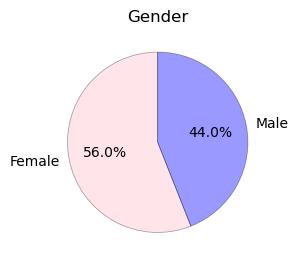

In [10]:
plt.subplot(1,2,2)
plt.title("Gender")
telco['gender'].value_counts().plot(kind='pie',
                                 legend=None,
                                 ylabel='',
                                 startangle=90,
                                 wedgeprops={'alpha':0.4,
                                             'edgecolor' : 'black',
                                             'linewidth': 0.5,
                                             'antialiased': True},
                                 autopct='%1.1f%%',
                                 colors = ['pink', 'blue'])

Pie chart di atas menunjukkan Customer Perempuan porsinya lebih banyak (56%) daripada Customer Pria, berdasarkan dataset yang disediakan.

In [11]:
telco['gender'] = telco['gender'].replace({'Male': 0, 'Female': 1})

Mengubah value pada kolom gender 'Male' = 0 dan 'Female' = 1. Tujuannya adalah untuk mendeskripsikan dalam bentuk numerik (Machine Learning Encoding)

In [12]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,200.0,0.560,0.497633,0.0,0.00,1.0,1.00,1.0
umur,200.0,38.850,13.969007,18.0,28.75,36.0,49.00,70.0
pembelian (idr 000),200.0,60.560,26.264721,15.0,41.50,61.5,78.00,137.0
daya_beli,200.0,50.200,25.823522,1.0,34.75,50.0,73.00,99.0
periode_durasi (bulan),200.0,26.025,18.022442,3.0,9.00,22.5,41.00,60.0
data_dibeli (gb),200.0,8.115,5.304949,1.0,4.00,7.0,10.25,20.0
panggilan_suara (menit),200.0,38.510,28.113372,1.0,15.00,31.5,60.50,97.0


In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   gender                   200 non-null    int64
 1   umur                     200 non-null    int64
 2   pembelian (idr 000)      200 non-null    int64
 3   daya_beli                200 non-null    int64
 4   periode_durasi (bulan)   200 non-null    int64
 5   data_dibeli (gb)         200 non-null    int64
 6   panggilan_suara (menit)  200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB


Melakukan rangkuman statistik dengan metode .describe kemudian ditranspose. Setelah itu melihat ringkasan dataframe tersebut.

In [14]:
telco.isna().sum()

gender                     0
umur                       0
pembelian (idr 000)        0
daya_beli                  0
periode_durasi (bulan)     0
data_dibeli (gb)           0
panggilan_suara (menit)    0
dtype: int64

Dapat disimpulkan bahwa dataset tidak memiliki missing value / Nan.

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'umur'}>,
        <Axes: title={'center': 'pembelian (idr 000)'}>],
       [<Axes: title={'center': 'daya_beli'}>,
        <Axes: title={'center': 'periode_durasi (bulan)'}>,
        <Axes: title={'center': 'data_dibeli (gb)'}>],
       [<Axes: title={'center': 'panggilan_suara (menit)'}>, <Axes: >,
        <Axes: >]], dtype=object)

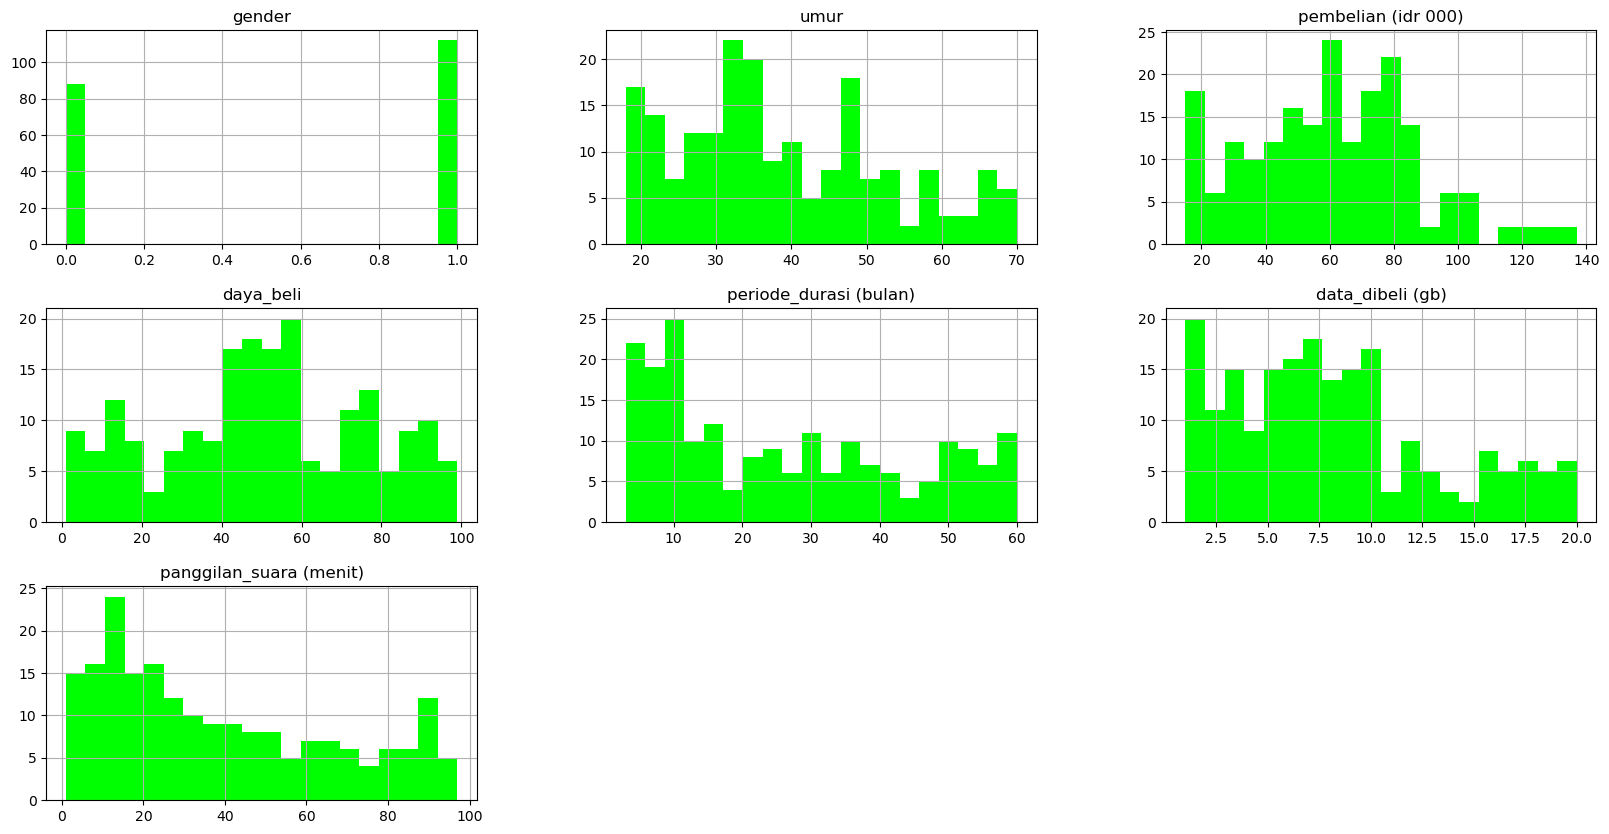

In [15]:
telco[['gender','umur','pembelian (idr 000)','daya_beli','periode_durasi (bulan)',
      'data_dibeli (gb)','panggilan_suara (menit)']].hist(figsize=(20,10),bins=20, color='lime')

In [16]:
telco[['gender','umur','pembelian (idr 000)','daya_beli','periode_durasi (bulan)',
      'data_dibeli (gb)','panggilan_suara (menit)']].agg(['min','max','mean','median', 'nunique'])

,gender,umur,pembelian (idr 000),daya_beli,periode_durasi (bulan),data_dibeli (gb),panggilan_suara (menit)
min,0.00,18.00,15.00,1.0,3.000,1.000,1.00
max,1.00,70.00,137.00,99.0,60.000,20.000,97.00
mean,0.56,38.85,60.56,50.2,26.025,8.115,38.51
median,1.00,36.00,61.50,50.0,22.500,7.000,31.50
nunique,2.00,51.00,64.00,84.0,55.000,20.000,76.00


In [17]:
def plot_distribution(dataframe, columns):
    for column in columns:
        sns.displot(dataframe[column], kde = True)
        plt.title(f'Distribution of {column}')
        plt.show()

columns_to_plot = ['gender','umur','pembelian (idr 000)','daya_beli','periode_durasi (bulan)','data_dibeli (gb)','panggilan_suara (menit)']

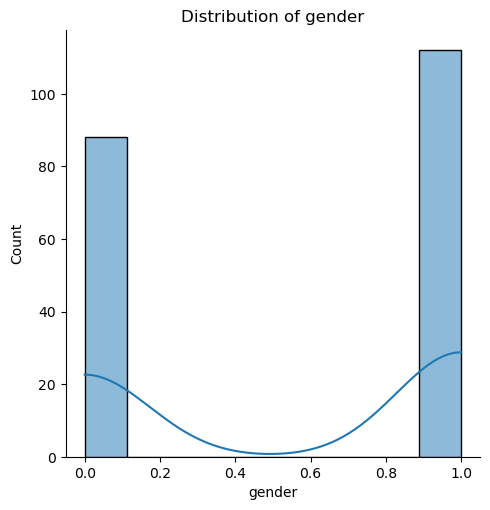

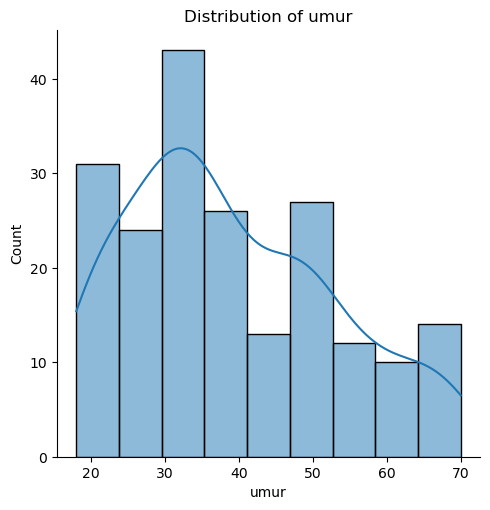

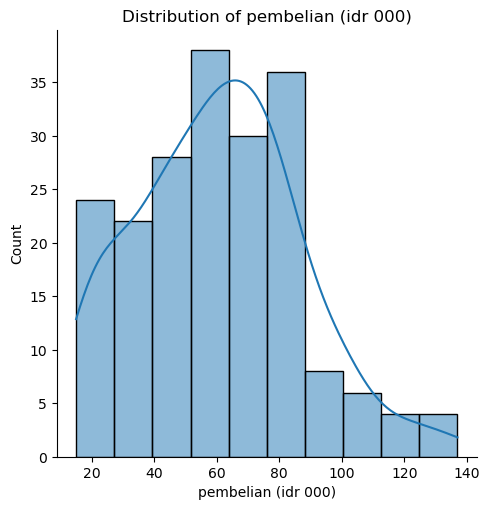

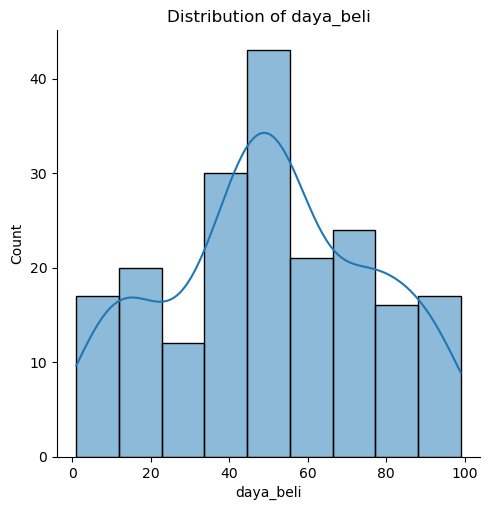

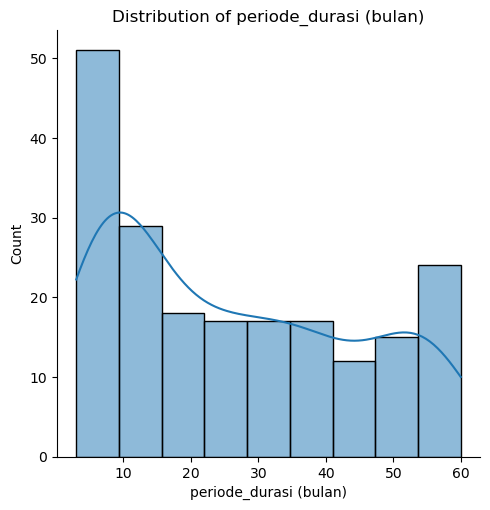

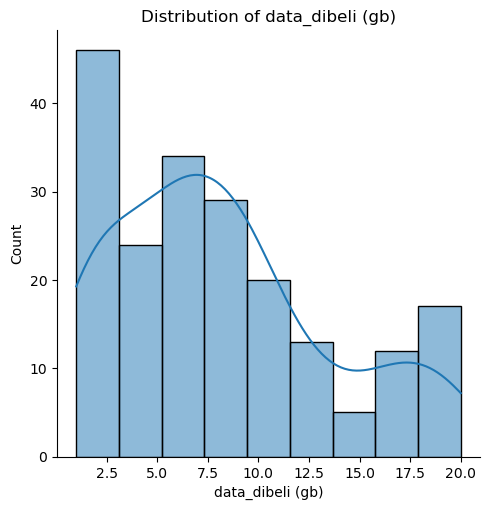

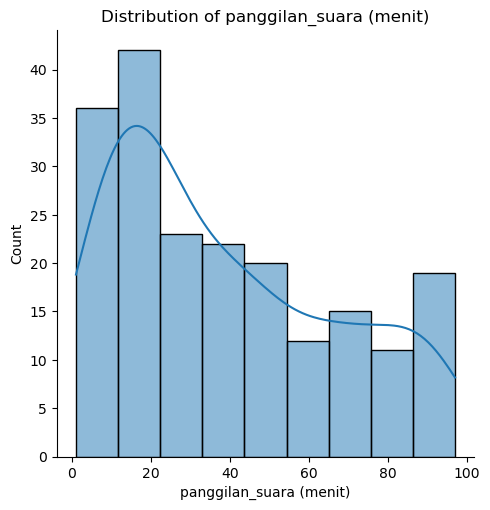

In [18]:
plot_distribution(telco, columns_to_plot)

Melihat bentuk persebaran data setiap variabel (kolom) dengan metode .hist() dan custom function.

Kesimpulan pada distribusi data yaitu ditemukan 1 kolom dengan bentuk cenderung normal (daya_beli) dan sisanya cenderung condong ke kanan (positive skewed).

# Correlation Analysis

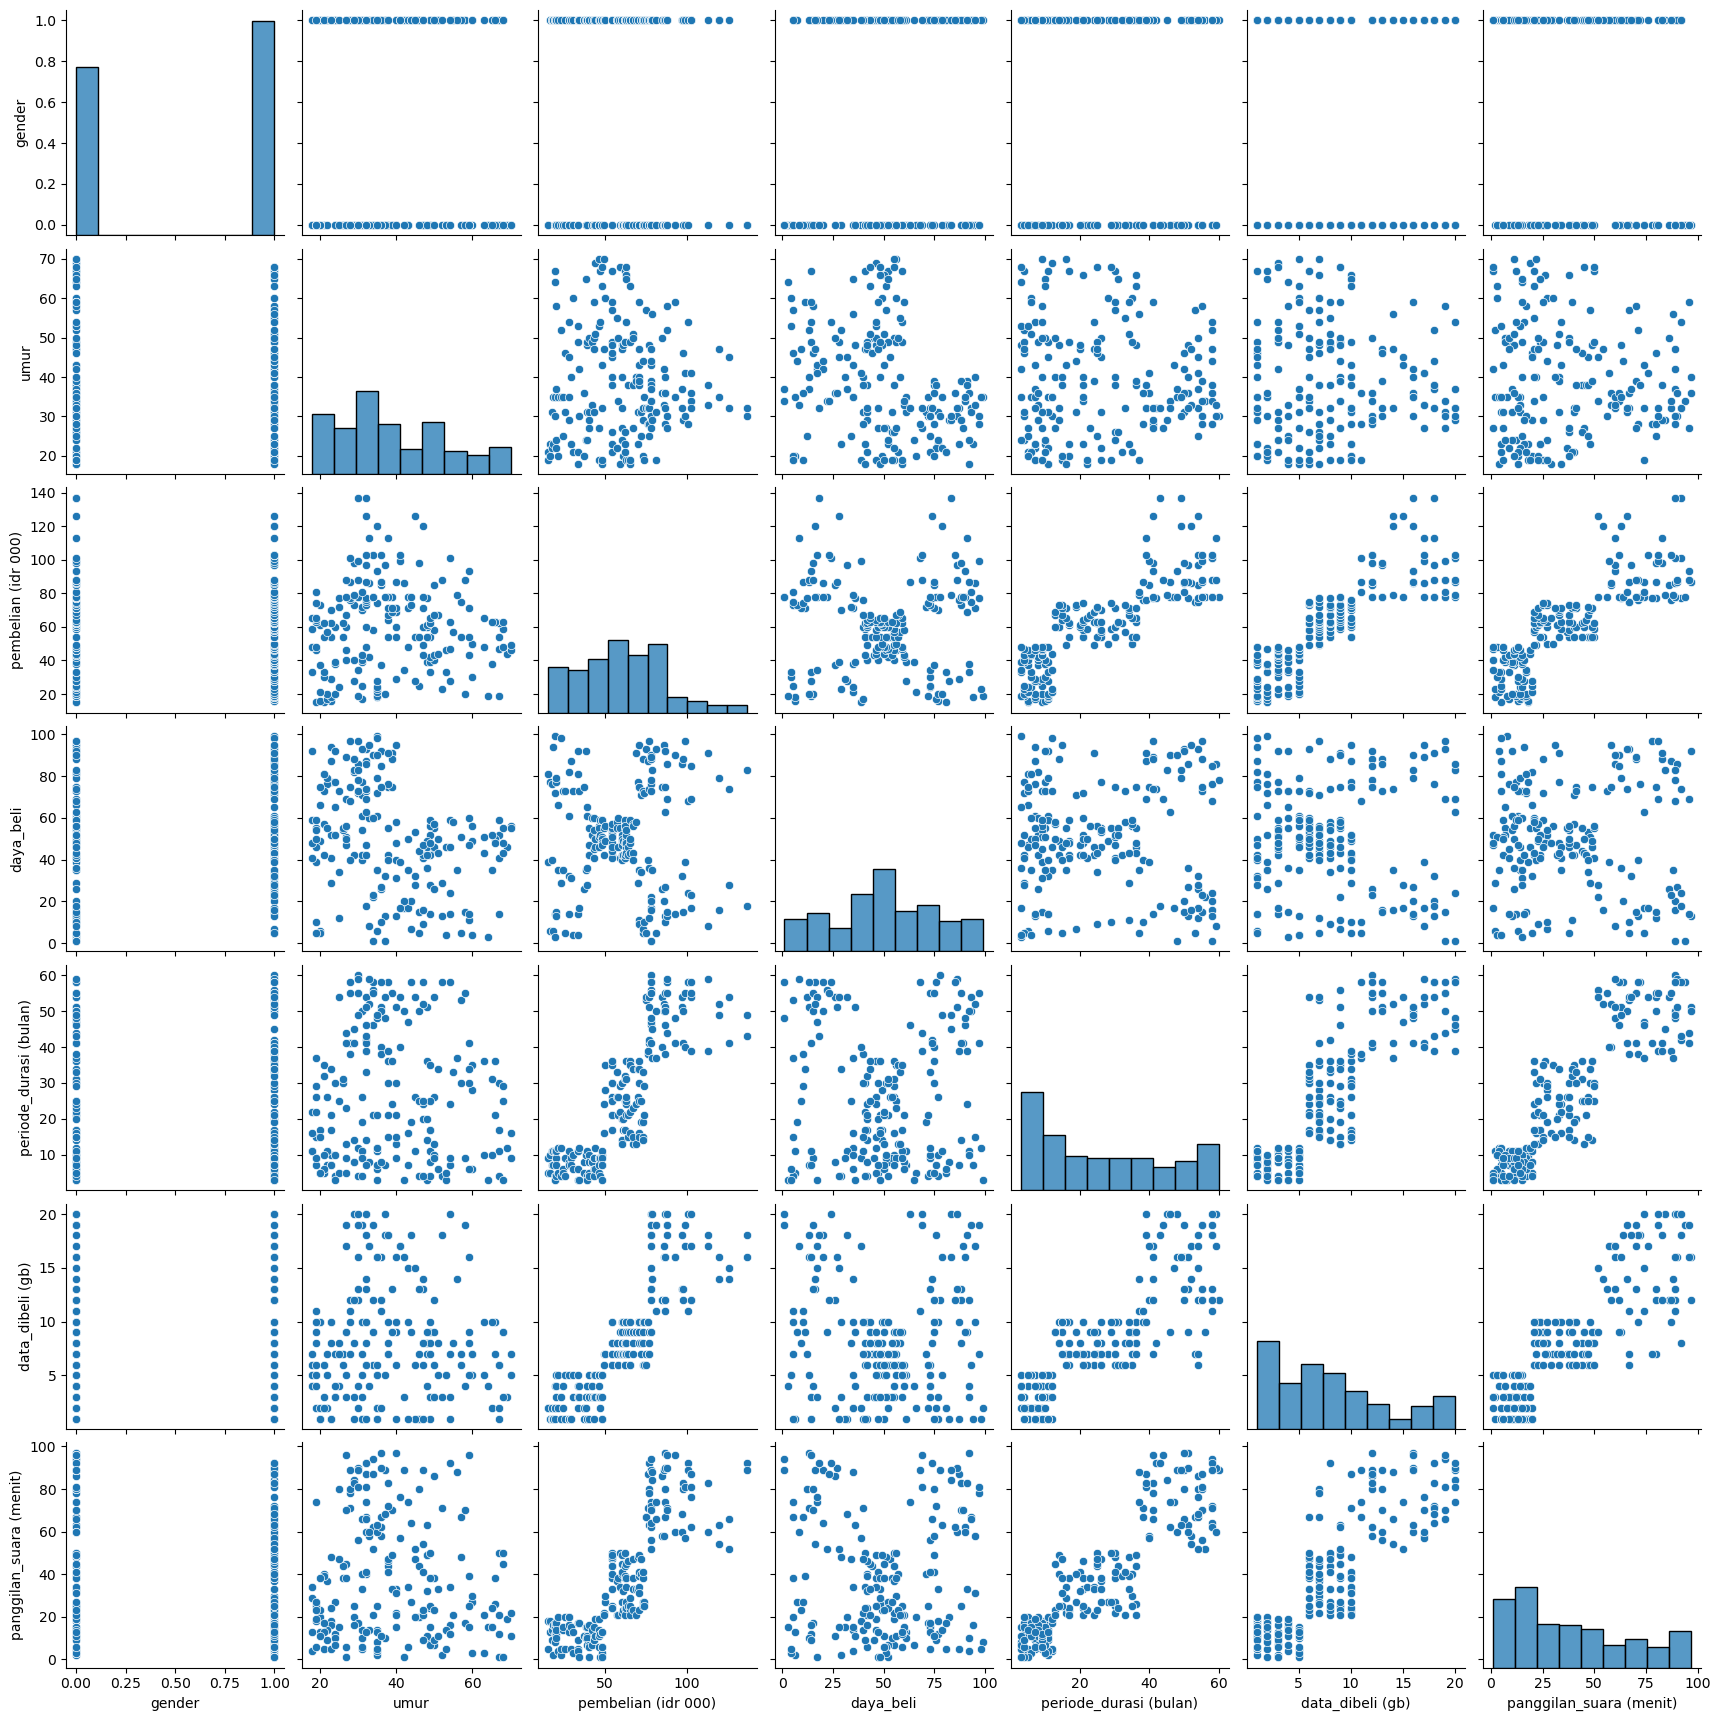

In [19]:
sns.pairplot(data=telco)

<Axes: >

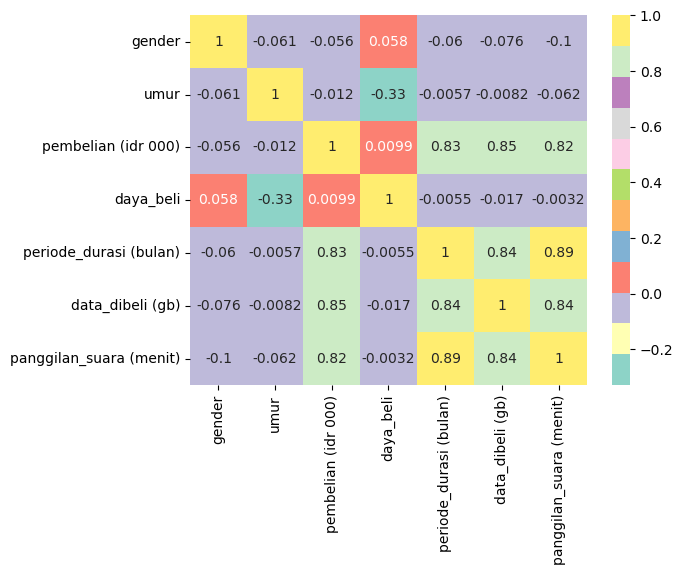

In [20]:
sns.heatmap(data=telco.corr(), annot = True, cmap = 'Set3')

# Kesimpulan Heatmap:
- pembelian (idr 000) dengan panggilan_suara (menit) = 0.82
- pembelian (idr 000) dengan data_dibeli (gb) = 0.85
- pembelian (idr 000) dengan periode_durasi (bulan) = 0.83
- periode_durasi (bulan) dengan panggilan_suara (menit) = 0.89
- periode_durasi (bulan) dengan data_dibeli (gb) = 0.84
- data_dibeli (gb) dengan panggilan_suara (menit) = 0.84

In [21]:
telco.corr()

,gender,umur,pembelian (idr 000),daya_beli,periode_durasi (bulan),data_dibeli (gb),panggilan_suara (menit)
gender,1.000000,-0.060867,-0.056410,0.058109,-0.060401,-0.075912,-0.103131
umur,-0.060867,1.000000,-0.012398,-0.327227,-0.005694,-0.008175,-0.062401
pembelian (idr 000),-0.056410,-0.012398,1.000000,0.009903,0.833676,0.852667,0.818084
daya_beli,0.058109,-0.327227,0.009903,1.000000,-0.005496,-0.017299,-0.003173
periode_durasi (bulan),-0.060401,-0.005694,0.833676,-0.005496,1.000000,0.838768,0.891070
data_dibeli (gb),-0.075912,-0.008175,0.852667,-0.017299,0.838768,1.000000,0.835654
panggilan_suara (menit),-0.103131,-0.062401,0.818084,-0.003173,0.891070,0.835654,1.000000


# Feature Scaling - Normalization - Keseragaman Data - StandardScaler

Tujuan dari feature scaling dengan StandardScaler adalah untuk menyeragamkan data, terutama pada fitur yang memiliki korelasi.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# pembelian (idr 000)
# panggilan_suara (menit)
# data_dibeli (gb)
# periode_durasi (bulan)

In [23]:
df_scaled_4s_standard = telco[['pembelian (idr 000)','data_dibeli (gb)','periode_durasi (bulan)','panggilan_suara (menit)']].copy()

In [24]:
df_scaled_4s_standard = scaler.fit_transform(df_scaled_4s_standard)

In [25]:
df_scaled_4s_standard

array([[-1.73899919e+00, -1.15558975e+00, -9.47026088e-01,
        -7.31376790e-01],
       [-1.73899919e+00, -1.15558975e+00, -1.16952855e+00,
        -1.19495057e+00],
       [-1.70082976e+00, -1.34456600e+00, -1.16952855e+00,
        -9.09674399e-01],
       [-1.70082976e+00, -1.34456600e+00, -8.91400473e-01,
        -7.31376790e-01],
       [-1.66266033e+00, -1.34456600e+00, -8.35774859e-01,
        -8.74014877e-01],
       [-1.66266033e+00, -1.15558975e+00, -1.05827732e+00,
        -1.05231249e+00],
       [-1.62449091e+00, -1.34456600e+00, -8.35774859e-01,
        -1.30192914e+00],
       [-1.62449091e+00, -1.34456600e+00, -1.05827732e+00,
        -8.02695834e-01],
       [-1.58632148e+00, -7.77637255e-01, -1.28077978e+00,
        -8.38355356e-01],
       [-1.58632148e+00, -1.15558975e+00, -1.22515416e+00,
        -7.67036312e-01],
       [-1.58632148e+00, -1.34456600e+00, -8.35774859e-01,
        -9.45333921e-01],
       [-1.58632148e+00, -1.15558975e+00, -1.28077978e+00,
      

In [26]:
mean=np.mean(df_scaled_4s_standard)
std=np.std(df_scaled_4s_standard)
minimum=np.min(df_scaled_4s_standard)
maximum=np.max(df_scaled_4s_standard)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Minimum Value:", minimum)
print("Maximum Value:", maximum)

Mean: 1.7763568394002505e-17
Standard Deviation: 1.0
Minimum Value: -1.7389991930659485
Maximum Value: 2.9176711658902788


Hasil di atas menunjukkan nilai mean dekat 0 setelah dilakukan Scaling, dalam artian adanya konsentrasi data di sekitar nilai nol
dan nilai std yaitu 1 (seragam) artinya variabel sudah memiliki perbandingan yang setara diikuti dengan nilai min -1.7 dan max 2.9.

# Clustering Dengan Elbow Method

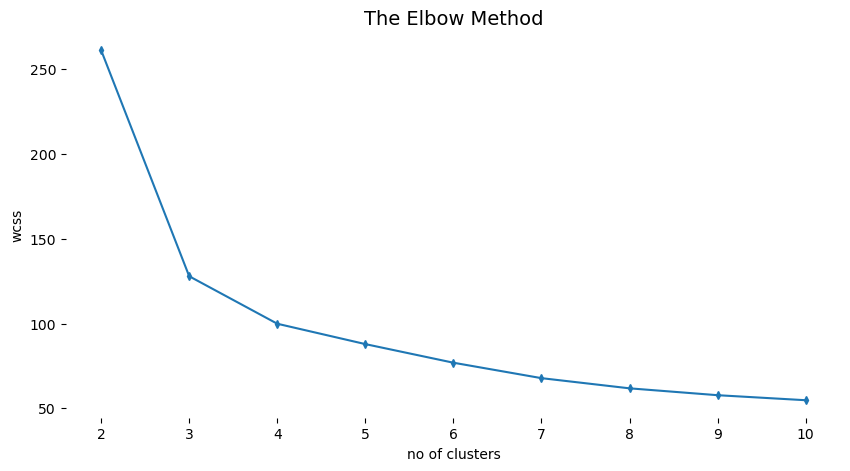

In [27]:
wcss=[]

# Penentuan Cluster 2 - 10 cluster
for i in range(2,11):
    kmeans = KMeans(i)
    kmeans.fit(df_scaled_4s_standard)
    wcss.append(kmeans.inertia_)

plt.subplots(figsize=(10,5))
plt.plot(range(2,11),
         wcss,
         marker='d',
         markersize='4')

plt.title('The Elbow Method', fontsize=14)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.box(None)
plt.show()

Penentuan nilai cluster dengan KMeans dengan fungsi perulangan for loop dari range 2 sampai 10.

In [28]:
from kneed import KneeLocator
nilai_k = KneeLocator(range(2,11), wcss, curve='convex', direction='decreasing')
nilai_k.elbow

4

Output nilai clusternya akan terlihat lebih detail dengan mengimport KneeLocator. Terlihat nilai clusternya adalah 4 dengan cara Elbow.

'convex': Digunakan ketika kurva data menunjukkan kecenderungan untuk menjadi cembung (menghadap ke atas) sebelum mencapai siku pada kurva elbow.

# Clustering Dengan silhouette_score

Melakukan penentuan nilai cluster dengan membandingkan dengan pendekatan silhouette_score

In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil=[]
K = range(2,11)
for n in K:
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(df_scaled_4s_standard)
    labels = algorithm.labels_
    sil.append(silhouette_score(df_scaled_4s_standard,labels,metric = 'euclidean'))
    print(f"Cluster {n} silhouette score: {silhouette_score(df_scaled_4s_standard, labels)}")

Cluster 2 silhouette score: 0.5775845676667263
Cluster 3 silhouette score: 0.5543844803214553
Cluster 4 silhouette score: 0.5046711587118541
Cluster 5 silhouette score: 0.5119981201481828
Cluster 6 silhouette score: 0.4095403877332106
Cluster 7 silhouette score: 0.3219253363369592
Cluster 8 silhouette score: 0.3102393617409882
Cluster 9 silhouette score: 0.3081722014205311
Cluster 10 silhouette score: 0.29822081464453104


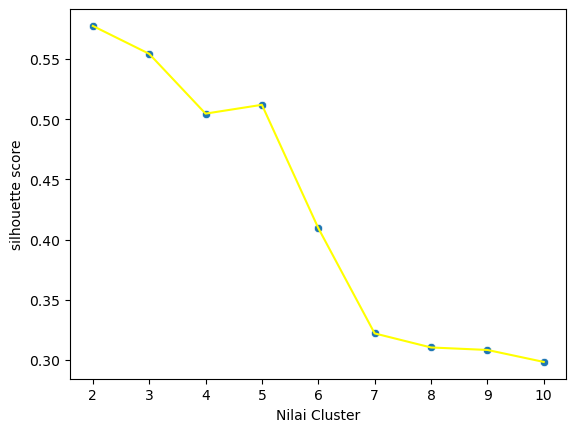

In [30]:
plt.figure()
sns.scatterplot(x=K,y=sil)
sns.lineplot(x=K,y=sil,color = 'yellow')
plt.xlabel('Nilai Cluster')
plt.ylabel('silhouette score')
plt.show()

Dari range cluster 2 sampai 4 cenderung menurun. Kemudian saat posisi cluster 5 mengalami kenaikan. Maka dari itu, nilai cluster yang diambil adalah 5 cluster dengan silhouette score: 0.51

In [31]:
clusters = KMeans(5)
y_kmeans = clusters.fit_predict(telco)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

Melakukan pengelompokkan data dengan metode fit_predict pada dataframe telco. Kemudian akan menghasilkan prediksi label cluster yang disimpan pada variabel y_kmeans.

In [32]:
telco_all_fts = telco.copy()

In [33]:
telco_all_fts['clusters'] = y_kmeans

In [34]:
telco_all_fts.head()

,gender,umur,pembelian (idr 000),daya_beli,periode_durasi (bulan),data_dibeli (gb),panggilan_suara (menit),clusters
0,0,19,15,39,9,2,18,3
1,0,21,15,81,5,2,5,0
2,1,20,16,6,5,1,13,3
3,1,23,16,77,10,1,18,0
4,1,31,17,40,11,1,14,3


Melalukan duplikasi dataframe dengan .copy() dan menyimpan ke variabel baru kemudian membuat kolom clusters yang berisi kelompok clusters untuk mewakili setiap fitur.

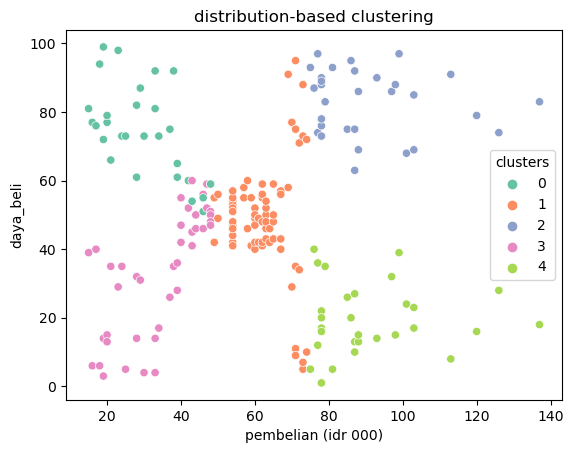

In [35]:
sns.scatterplot(data=telco_all_fts,
                x = 'pembelian (idr 000)',
                y = 'daya_beli',
                hue = 'clusters',
                palette = 'Set2')

plt.title('distribution-based clustering')
plt.show()

Menjalankan scatterplot untuk melihat pola cluster yang telah dibentuk. Dalam hal ini terdapat 5 cluster dan dibedakan berdasarkan warna.

In [36]:
telco_all_fts.groupby('clusters').mean()

,gender,umur,pembelian (idr 000),daya_beli,periode_durasi (bulan),data_dibeli (gb),panggilan_suara (menit)
clusters,,,,,,,
0,0.551724,25.310345,30.275862,73.965517,7.758621,2.862069,11.689655
1,0.542857,40.971429,62.428571,49.585714,24.500000,7.957143,34.114286
2,0.566667,32.033333,91.033333,82.866667,48.666667,14.366667,75.433333
3,0.634146,47.609756,34.195122,33.414634,7.146341,2.804878,10.317073
4,0.500000,41.833333,91.033333,18.933333,50.400000,14.566667,76.300000


In [37]:
telco_all_fts.nlargest(10, ['pembelian (idr 000)', 'daya_beli'])

,gender,umur,pembelian (idr 000),daya_beli,periode_durasi (bulan),data_dibeli (gb),panggilan_suara (menit),clusters
199,0,30,137,83,49,16,89,2
198,0,32,137,18,43,18,92,4
197,0,32,126,74,41,14,66,2
196,1,45,126,28,54,15,52,4
195,1,35,120,79,49,16,63,2
194,1,47,120,16,52,14,54,4
193,1,38,113,91,39,18,83,2
192,0,33,113,8,59,17,60,4
189,1,36,103,85,58,12,62,2
191,1,32,103,69,39,20,81,2


In [38]:
telco_all_fts.nsmallest(10, ['pembelian (idr 000)', 'daya_beli'])

,gender,umur,pembelian (idr 000),daya_beli,periode_durasi (bulan),data_dibeli (gb),panggilan_suara (menit),clusters
0,0,19,15,39,9,2,18,3
1,0,21,15,81,5,2,5,0
2,1,20,16,6,5,1,13,3
3,1,23,16,77,10,1,18,0
4,1,31,17,40,11,1,14,3
5,1,22,17,76,7,2,9,0
6,1,35,18,6,11,1,2,3
7,1,23,18,94,7,1,16,0
8,0,64,19,3,3,4,15,3
10,0,67,19,14,11,1,12,3


# Export File dalam bentuk .csv dan excel


telco_all_fts.to_csv('telco_fp_clear.csv', index=False)

telco_all_fts.to_excel('telco_clustered.xlsx', index=False)

Rekomendasi dan Action Bisa dilihat pada:
https://docs.google.com/presentation/d/11G_65b-zsxIe11mto6Epsz499ydwSiyNBiX_laidSUw/edit?usp=sharing

Dashboard: https://public.tableau.com/app/profile/galang6393/viz/FinalProject_Cust_Segment_GalangIW/Dashboard1?publish=yes